In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('uber-raw-data-aug14.csv')
df

,Date/Time,Lat,Lon,Base
0,8/1/2014 0:03:00,40.7366,-73.9906,B02512
1,8/1/2014 0:09:00,40.7260,-73.9918,B02512
2,8/1/2014 0:12:00,40.7209,-74.0507,B02512
3,8/1/2014 0:12:00,40.7387,-73.9856,B02512
4,8/1/2014 0:12:00,40.7323,-74.0077,B02512
...,...,...,...,...
829270,8/31/2014 23:55:00,40.7552,-73.9753,B02764
829271,8/31/2014 23:55:00,40.7552,-73.9753,B02764
829272,8/31/2014 23:55:00,40.7617,-73.9788,B02764
829273,8/31/2014 23:59:00,40.7395,-73.9889,B02764


# 1.on what date we see the most nnumber of uber pickups?

In [11]:
import pandas as pd

# Assuming 'df' is your DataFrame containing the 'Date/Time' column
# Convert 'Date/Time' column to datetime type
df['Date/Time'] = pd.to_datetime(df['Date/Time'])

# Group and count by date
pickups_by_date = df.groupby(df['Date/Time'].dt.date).size()

# Get the date with the most number of uber pickups
result = pickups_by_date.idxmax()

print("Date with the most number of uber pickups:", result)
print("value: ", pickups_by_date.max())


Date with the most number of uber pickups: 2014-08-07
value:  32759


# Q.howmany uber pickups were made on the date with the highest number of pickups?

In [12]:
print("value: ", pickups_by_date.max())


value:  32759


# Q.How many uber pickups were made on the date with the highest number of pickups ?

In [14]:
print("number of unique TLC base companies:", df['Base'].nunique())

number of unique TLC base companies: 5


# Q.4.Which TLC base company had the highest number of pickups ?

In [16]:
pickups_by_company = df.groupby('Base').size()
print(pickups_by_company.max())
print(pickups_by_company.idxmax())

355803
B02617


# Q.Howmany uber pickups were made at each unique TLC base company ?

In [18]:
df.groupby('Base').size()

Base
B02512     31472
B02598    220129
B02617    355803
B02682    173280
B02764     48591
dtype: int64

# Q.6.Can you determine  the bussiest time of the day  for uber  pickups based on the date/time column ?

In [21]:
import pandas as pd

# Assuming 'df' is your DataFrame containing the 'Date/Time' column
# Convert 'Date/Time' column to datetime type
df['Date/Time'] = pd.to_datetime(df['Date/Time'])

# Extract the hour from the 'Date/Time' column
df['Hour'] = df['Date/Time'].dt.hour

# Group and count by hour
pickups_by_hour = df.groupby(df['Hour']).size()

# Get the hour with the highest number of Uber pickups
result = pickups_by_hour.idxmax()

print("Busiest time of day for Uber pickups (hour):", result)


Busiest time of day for Uber pickups (hour): 17


# Q.7.Can you a visulization(e.g. a bar chart or line plot) to represent the number of uber pickups over time?

<Axes: xlabel='Date/Time'>

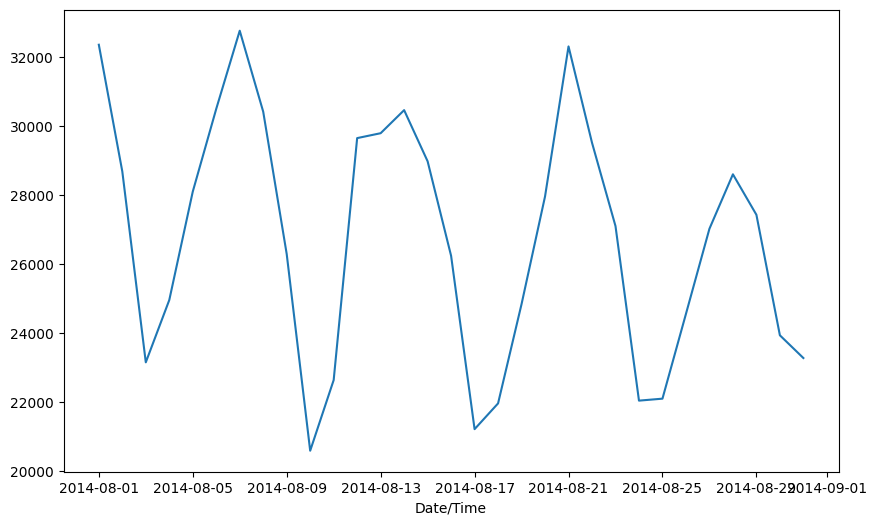

In [25]:
 pickups_by_date = df.groupby(df['Date/Time'].dt.date).size()

pickups_by_date.plot(kind = 'line' , figsize = (10 , 6))

# Q.8. Can you crerate a bar chart  to compare the number of uber pickups  based on lattitude ans longitude?

Text(0.5, 1.0, 'Distribution of uber pickups by Latitude and Longitude')

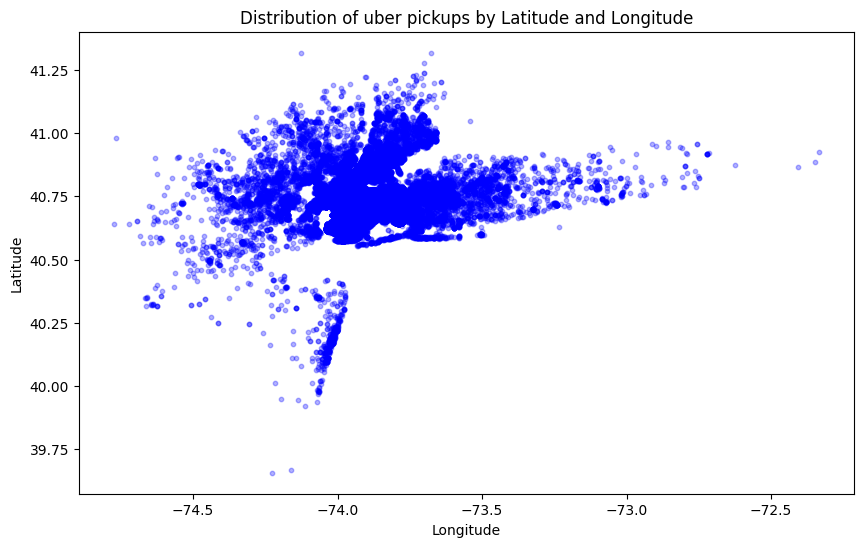

In [29]:
plt.figure(figsize = (10, 6))
plt.scatter(df['Lon'] , df['Lat'], s = 10, alpha= 0.3, color='blue')
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Distribution of uber pickups by Latitude and Longitude")



# Q.9.Can you create bar chart to compare the number of uber pickups for each TLC base company ?

Text(0.5, 1.0, 'UBER PICKUPS FOR EACH TLC BASE COMAPANY')

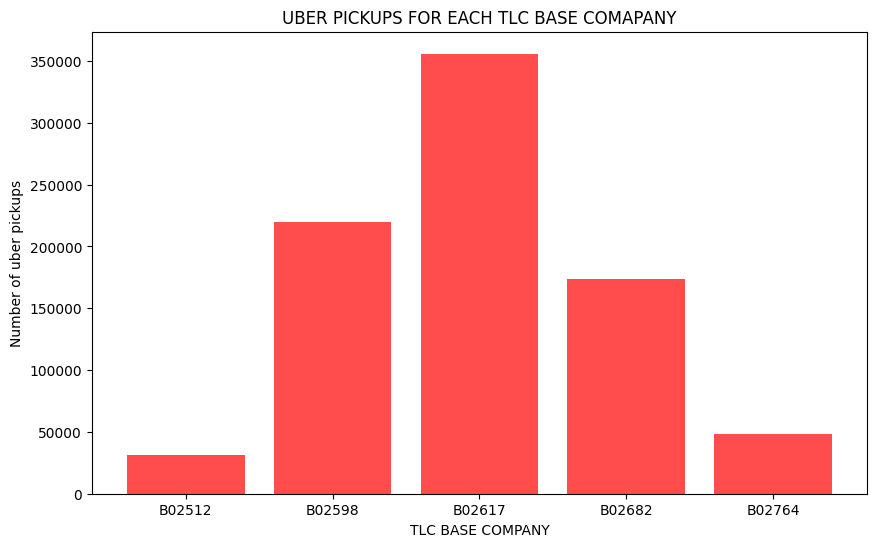

In [35]:
pickups_by_base = df.groupby('Base').size()
plt.figure(figsize = (10,6))
plt.bar(pickups_by_base.index, pickups_by_base.values, alpha = 0.7 , color = 'red')
plt.xlabel('TLC BASE COMPANY')
plt.ylabel('Number of uber pickups')
plt.title('UBER PICKUPS FOR EACH TLC BASE COMAPANY')

# Q.10 CAN you create a piechart to display the percentage distribution of uber pickups for each day of the week?

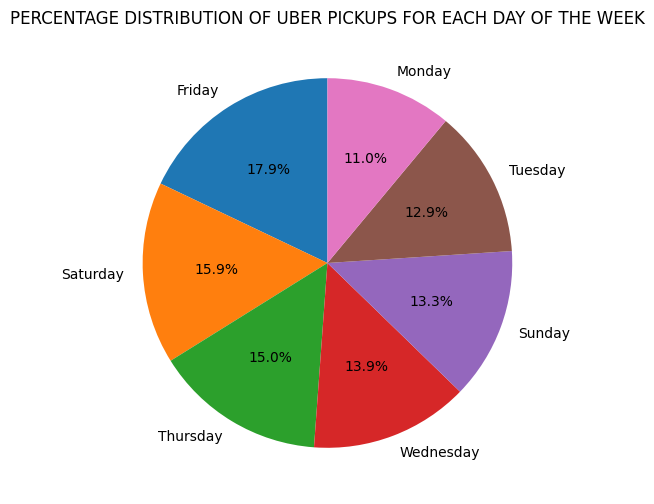

In [42]:
pickups_by_day = df['Date/Time'].dt.day_name().value_counts()
plt.figure(figsize=(11,6))
plt.title('PERCENTAGE DISTRIBUTION OF UBER PICKUPS FOR EACH DAY OF THE WEEK')
plt.pie(x = pickups_by_day.values, labels  = pickups_by_day.index,autopct = '%1.1f%%',
  startangle = 90)
plt.show()